In [1]:
# This is to rain and test the YOLOv8 algorithm on Hard Hat Workers dataset.
# Note: the notebooks was run on the "Python 3.10 - SDK V2" env. in Azure ML.

# He Zhang, Feb, 2023

In [2]:
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Torch: 1.13.1+cu117
Torchvision: 0.14.1+cu117
GPU: 4 Tesla M60


In [3]:
# go to folder YOLOv8
%cd yolov8/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov8


In [4]:
%%writefile ./hardhat7041yolov8.yaml

# train & val & test sets
path: ../datasets/hard_hat_workers_dataset # dataset root dir
train: images/train # train images (relative to 'path'), 5269 images
val: images/test # val images (relative to 'path'), 1766 images
test:  # test images (optional), no test images by default in this dataset

# classe information
nc: 3 # number of classes
names: ["head", "helmet", "person"] # class names

Overwriting ./hardhat7041yolov8.yaml


In [5]:
# train
model = YOLO("yolov8s.pt")
results = model.train(data="hardhat7041yolov8.yaml", imgsz=672, batch=10, 
                      project="runs/train/", name="exp_hardhat", epochs=10, cache=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=hardhat7041yolov8.yaml, epochs=10, patience=50, batch=10, imgsz=672, save=True, cache=True, device=, workers=8, project=runs/train/, name=exp_hardhat, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

       7/10      4.58G      1.194     0.6363      1.113         48        672: 100%|██████████| 527/527 [05:00<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                   all       1766       6808      0.959       0.62      0.653      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/10      4.58G      1.172      0.603      1.099         29        672: 100%|██████████| 527/527 [05:00<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:31<00:00,  2.79it/s]
                   all       1766       6808      0.961      0.623      0.659      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/10      4.58G       1.15     0.5757      1.079         32        672: 100%|██████████| 527/527 [05:00<00:00,  1.75it/s]
 

In [7]:
# evaluate
model = YOLO("runs/train/exp_hardhat/weights/best.pt")
results = model.val(project="runs/val/", name="exp_hardhat")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/datasets/hard_hat_workers_dataset/labels/test.cache... 1766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:35<00:00,  3.10it/s]
                   all       1766       6808      0.966      0.627      0.661      0.459
                  head       1766       1803      0.937      0.941       0.97      0.671
                helmet       1766       4863      0.961       0.94      0.983      0.688
                person       1766        142          1          0     0.0311     0.0186
Speed: 0.3ms pre-process, 12.3ms inference, 0.0ms loss, 1.2ms post-process 

In [11]:
# infer
model = YOLO("runs/train/exp_hardhat/weights/best.pt")
results = model.predict(source="../datasets/test_images/hardhat/", save=True, 
                        project="runs/detect/", name="exp_hardhat", save_txt=True, line_thickness=2)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.4 torch-1.13.1+cu117 CUDA:0 (Tesla M60, 8129MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/exp_hardhat
4 labels saved to runs/detect/exp_hardhat/labels


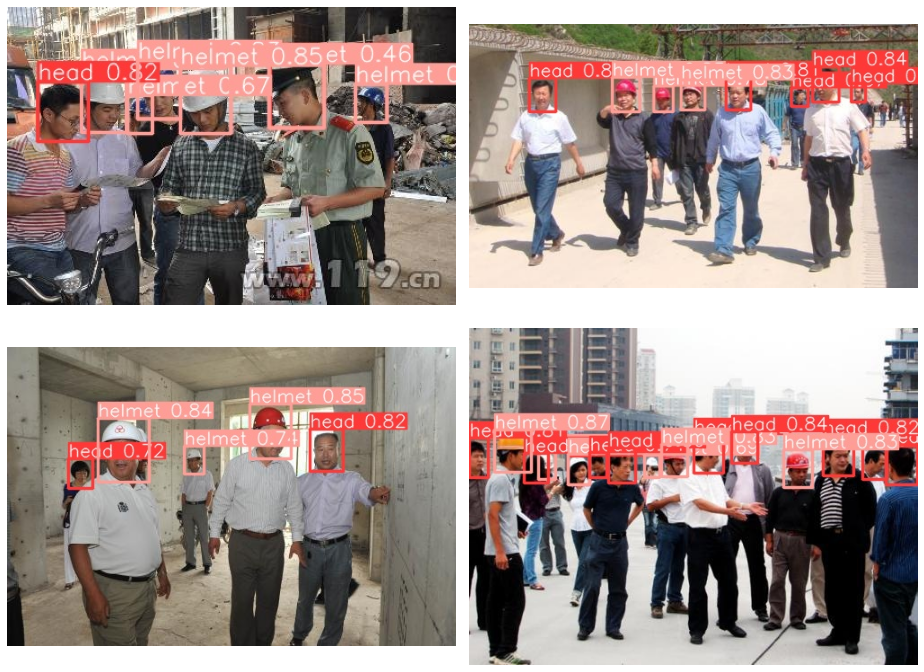

In [12]:
# visualize detection results
bbox_img1 = plt.imread("runs/detect/exp_hardhat/005382_jpg.rf.bad5f80a3fa19ab150532b976adaa2f1.jpg")
bbox_img2 = plt.imread("runs/detect/exp_hardhat/005398_jpg.rf.e985245df68dd22ebdb6312ab2dc9fc2.jpg")
bbox_img3 = plt.imread("runs/detect/exp_hardhat/005407_jpg.rf.c04655757eebeae99b5dc10d9f57972a.jpg")
bbox_img4 = plt.imread("runs/detect/exp_hardhat/005457_jpg.rf.44b81185f7ddc9286805c567057cf9a5.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()